# Práctica 1: Preprocesamiento de dataset & vectorización

### García Sánchez Diego Emiliano

## Table of Contents

- [Packages](#0)
- [1 - Dataset](#1)
- [2 - Remove non-letter characters, punctuations, diacritics, and text normalization](#2)
- [3 - Removing Stopwords](#3)
- [4 - Lemmatization using stanza](#4)
- [5 - Stemming](#5)
- [6 - Text preprocessing](#6)
- [7 - Bag of words](#7)
- [8 - TF-IDF](#8)

<a name='0'></a>
## Packages

In [ ]:
import pandas as pd
import numpy as np
import re
from unicodedata import normalize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
from nltk import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer

!pip install stanza
import stanza

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

<a name='1'></a>
## 1 - Dataset

In [ ]:
# Read dataset of opinions
data = pd.read_csv('/content/sentiment_analysis_dataset.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user       2590 non-null   object
 1   text       2590 non-null   object
 2   date       2590 non-null   object
 3   emotion    2590 non-null   object
 4   sentiment  2590 non-null   object
dtypes: object(5)
memory usage: 101.3+ KB


,user,text,date,emotion,sentiment
0,@erreborda,termine bien abrumado después de hoy,"Jan 6, 2024 · 2:53 AM UTC",overwhelmed,scared
1,@shpiderduck,me siento abrumado,"Jan 6, 2024 · 2:35 AM UTC",overwhelmed,scared
2,@Alex_R_art,Me siento un poco abrumado por la cantidad de ...,"Jan 6, 2024 · 12:20 AM UTC",overwhelmed,scared
3,@anggelinaa97,Salvador la única persona que no la ha abrumad...,"Jan 5, 2024 · 10:38 PM UTC",overwhelmed,scared
4,@diegoreyesvqz,Denme un helado o algo que ando full abrumado.,"Jan 5, 2024 · 8:38 PM UTC",overwhelmed,scared


In [ ]:
df_text = data[['text']].copy()
df_text.head()

,text
0,termine bien abrumado después de hoy
1,me siento abrumado
2,Me siento un poco abrumado por la cantidad de ...
3,Salvador la única persona que no la ha abrumad...
4,Denme un helado o algo que ando full abrumado.


<a name='2'></a>
## 2 - Remove non-letter characters, punctuations, diacritics, and text normalization

In [ ]:
def clean_data(s):
    s = re.sub(r'[^a-zA-Z\s]', '', s.lower()) # Remove non-letter characters

    s = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1",
        normalize("NFD", s), 0, re.I
    ) # Remove diacritics

    s = normalize('NFC', s)
    # Remove Extra Whitespaces
    return  " ".join(s.split())

<a name='3'></a>
## 3 - Removing Stopwords

In [ ]:
def remove_stopwords(text):
    result = []
    stpw = stopwords.words(fileids=('english', 'spanish'))

    for token in text:
        if token not in stpw:
            result.append(token)

    return result

<a name='4'></a>
## 4 - Lemmatization using stanza

In [ ]:
# Descargar y preparar el modelo de Stanza para español
stanza.download('es')
nlp = stanza.Pipeline(lang='es', processors='tokenize,mwt,pos,lemma')

def lemSentence(text):
    doc = nlp(text)
    lem_data = []
    for sentence in doc.sentences:
        for word in sentence.words:
            lem_data.append(word.lemma)
    return lem_data

<a name='5'></a>
## 5 - Stemming

In [ ]:
def stemSentence_ss(sentence):
  stemmer_ss = SnowballStemmer("spanish")
  stemmed_words_ss = [stemmer_ss.stem(word) for word in sentence]

  return stemmed_words_ss

<a name='6'></a>
## 6 - Text Preprocessing

In [ ]:
def text_preprocessing(df_column):
  # clean text
  df_column = df_column.apply(lambda x: clean_data(x))
  # tokenization
  df_column = df_column.apply(lambda X: word_tokenize(X))
  # removing stopwords
  df_column = df_column.apply(remove_stopwords)
  # lemmatization \ Stemming
  # You will like to either perform stemming or lemmatization and not both.
  # df_column = df_column.apply(lambda x: lemSentence(' '.join(x)))
  df_column = df_column.apply(lambda x: stemSentence_ss(x))

  return df_column

In [ ]:
df_text['text'] = text_preprocessing(df_text['text'])
df_text.head()

,text
0,"[termin, bien, abrum, despus, hoy]"
1,"[sient, abrum]"
2,"[sient, abrum, cantid, cos, quier, dibuj, ver,..."
3,"[salvador, nic, person, abrum, version, nadiec..."
4,"[denm, hel, ando, full, abrum]"


<a name='7'></a>
## 7 - Bag of words

In [ ]:
tokens_list = list(df_text['text'].values.flatten())
tokens_flat = []
list(map(tokens_flat.extend, tokens_list))
print("The number of tokens is", len(tokens_flat))

# unique tokens
vocabulary = set(tokens_flat)
print("The number of unique tokens are", len(vocabulary))

The number of tokens is 31667
The number of unique tokens are 6917


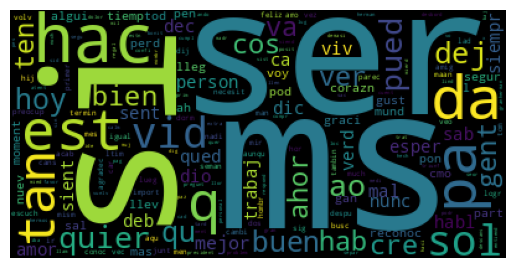

In [ ]:
# Word Cloud
wordcloud = WordCloud().generate(" ".join(tokens_flat))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
corpus = [' '.join(words) for words in tokens_list]

vectorizer = CountVectorizer()
bag = vectorizer.fit_transform(corpus)

# Create a dataframe with words and their respective frequency
# Each row represents a document
count_array = bag.toarray()
features = vectorizer.get_feature_names_out()
bag_words = pd.DataFrame(data=count_array, columns=features)

#bag_words.to_csv("bag_of_words.csv")
bag_words.sample(5)

,aaaa,aaaaa,aaaaaa,aaaah,aaaj,aaron,abaj,abalanz,abandon,abat,...,zell,zen,zendal,zeus,zon,zoomerian,zor,zurd,zymborsk,zzz
1237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a name='8'></a>
## 8 - TF - IDF

In [ ]:
corpus = [' '.join(words) for words in tokens_list]
v = TfidfVectorizer()
x = v.fit_transform(corpus)

# Create a dataframe with words and their respective vectorization
# Each row represents a document
count_array = x.toarray()
features = v.get_feature_names_out()
tf_idf = pd.DataFrame(data=count_array, columns=features)

#tf_idf.to_csv("bag_of_words.csv")
tf_idf.sample(5)

,aaaa,aaaaa,aaaaaa,aaaah,aaaj,aaron,abaj,abalanz,abandon,abat,...,zell,zen,zendal,zeus,zon,zoomerian,zor,zurd,zymborsk,zzz
2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
